**MNIST Handwritten Digit classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images


Test data = 10,000 images




Image dimension --> 28 X 28



Grayscale Image --> 1 channel

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


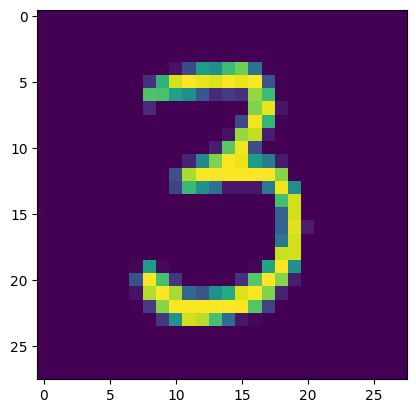

3


In [7]:
# Display the image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

In [8]:
# Unique values in Y_train
print(np.unique(Y_train))

# Unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the these labels as such or we can also apply one Hot Encoding

All the images have the same directions in this dataset, if not, we have to resize all the images to a common dimension

In [9]:
X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [10]:
# Setting up the layers of the Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compiling the neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8528 - loss: 0.5113
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9530 - loss: 0.1560
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1114
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.0886
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9775 - loss: 0.0738
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0628
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9837 - loss: 0.0537
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9860 - loss: 0.0459
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9882 - loss: 0.0388
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0351


Training data Accuracy = 99%


**Accuracy on Test data:**



In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1286
0.9670000076293945


Test data accuracy = 97.21%

In [14]:
print(X_test.shape)

(10000, 28, 28)


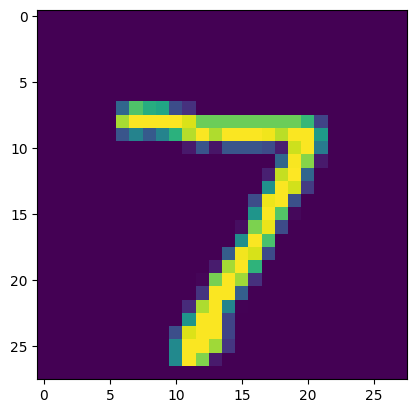

In [15]:
# first data point in X test
plt.imshow(X_test[0])

In [16]:
print(Y_test[0])

7


In [17]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
print(Y_pred.shape)

(10000, 10)


In [19]:
print(Y_pred[0])

[7.3045486e-04 9.1530550e-05 1.7769383e-02 9.7433740e-01 7.4018258e-10
 4.1297539e-03 2.0027109e-12 9.9999940e-01 2.9691856e-02 8.3723271e-01]


model.predict() gives the prediction probability of each class for that data point

In [20]:
# Converting the predicton probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [21]:
# Converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [22]:
print(Y_pred)

[[7.3045486e-04 9.1530550e-05 1.7769383e-02 ... 9.9999940e-01
  2.9691856e-02 8.3723271e-01]
 [2.0283589e-03 9.8284101e-01 9.9999994e-01 ... 1.0829252e-03
  4.6938324e-01 2.8731788e-09]
 [3.0150669e-04 9.9995327e-01 4.4943213e-01 ... 9.7113967e-01
  9.0860468e-01 6.1702536e-05]
 ...
 [2.3814680e-06 1.6171190e-04 1.5717354e-09 ... 3.8802645e-01
  7.4445613e-04 9.9908835e-01]
 [7.8098594e-05 4.5216052e-04 6.6193395e-05 ... 5.9166610e-02
  9.6505147e-01 3.0045048e-05]
 [9.0333477e-02 2.9199614e-09 4.1151736e-02 ... 1.2024577e-06
  4.5783079e-08 1.6506149e-04]]


Y_test --> True labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 952    0    1    2    2    2    3    1    1   16]
 [   0 1116    2    4    1    1    2    3    6    0]
 [   3    4  981   13    4    0    5   16    6    0]
 [   0    0    0  995    1    4    0    4    4    2]
 [   0    0    7    1  962    0    5    5    0    2]
 [   3    0    0   26    2  844    6    2    8    1]
 [   1    3    0    4   10    1  936    0    3    0]
 [   0    2    6    6    2    0    1 1001    2    8]
 [   0    0    2   19    8    5    3    3  930    4]
 [   0    5    0    9   27    5    0    4    6  953]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

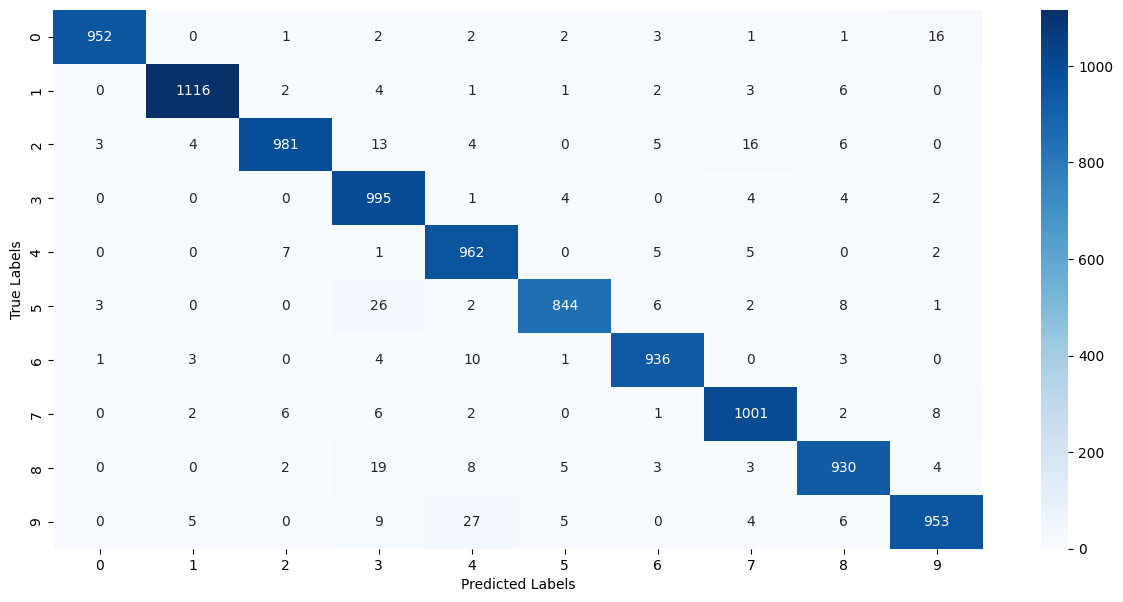

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [30]:
input_image_path = '/content/MNIST_digit.png'
Input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [31]:
type(input_image)

numpy.ndarray

In [32]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


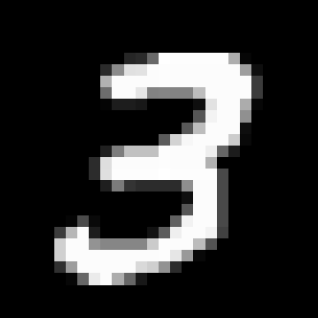

In [33]:
cv2_imshow(input_image)

In [34]:
input_image.shape

(318, 318, 3)

In [35]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [36]:
grayscale.shape

(318, 318)

In [37]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [38]:
input_image_resize.shape

(28, 28)

In [39]:
cv2_imshow(input_image_resize)

In [40]:
input_image_resize = input_image_resize/255

In [41]:
type(input_image_resize)

numpy.ndarray

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[4.2183029e-10 7.8810134e-04 1.4734679e-08 1.0000000e+00 1.7070163e-13
  3.3836756e-02 2.0099134e-26 1.2151270e-02 9.0862018e-01 9.8658317e-01]]


In [44]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[4.2183029e-10 7.8810134e-04 1.4734679e-08 1.0000000e+00 1.7070163e-13
  3.3836756e-02 2.0099134e-26 1.2151270e-02 9.0862018e-01 9.8658317e-01]]


In [45]:
input_pred_label = np.argmax(input_prediction)

In [46]:
print(input_pred_label)

3


**Predictive System**

path of the image to be predicted/content/MNIST_digit.png


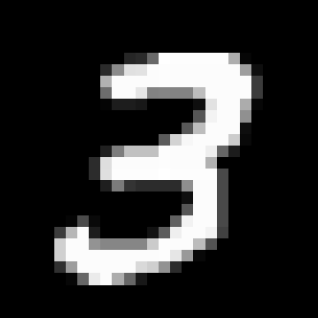

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The handwritten Digit is recognized as 3


In [48]:
input_image_path = input('path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten Digit is recognized as', input_pred_label)



In [50]:
import joblib
import pickle

In [53]:
# Save model proper way
model.save("MNIST_model.keras")

In [ ]:
#from tensorflow.keras.models import load_model

#model = load_model("model.keras")
#with open("scaler.pkl", "rb") as f:
#  scaler = pickle.load(f)